In [1]:
from qiskit import *
from qiskit.visualization import plot_histogram
from qiskit.quantum_info import Statevector


# Bit flip correction

000 is wrong transmitted as 010. how can it be corrected ? 

In [2]:
transmitted = "010"

T = len(transmitted)
QReg = QuantumRegister(T)
Parity = QuantumRegister(T-1)
CReg = ClassicalRegister(T-1)

QC = QuantumCircuit(QReg, Parity, CReg)

for n in range(len(transmitted)):
    if transmitted[n] == "1":
        QC.x(n)

QC.barrier()
QC.h(0)
QC.cx(0,1)
QC.cx(0,2)

state = Statevector(QC)
state.draw(output="latex")


<IPython.core.display.Latex object>

In [3]:
QC.barrier()

for n in range(1,T):
    QC.cx(0, T+n-1)
    QC.cx(n, T+n-1)

QC.barrier()

for i in range(T-1):
    QC.measure(Parity[i], CReg[i])

QC.draw()    

░ ┌───┐           ░                      ░       
q0_0: ──────░─┤ H ├──■────■───░───■─────────■────────░───────
      ┌───┐ ░ └───┘┌─┴─┐  │   ░   │         │        ░       
q0_1: ┤ X ├─░──────┤ X ├──┼───░───┼────■────┼────────░───────
      └───┘ ░      └───┘┌─┴─┐ ░   │    │    │        ░       
q0_2: ──────░───────────┤ X ├─░───┼────┼────┼────■───░───────
            ░           └───┘ ░ ┌─┴─┐┌─┴─┐  │    │   ░ ┌─┐   
q1_0: ──────░─────────────────░─┤ X ├┤ X ├──┼────┼───░─┤M├───
            ░                 ░ └───┘└───┘┌─┴─┐┌─┴─┐ ░ └╥┘┌─┐
q1_1: ──────░─────────────────░───────────┤ X ├┤ X ├─░──╫─┤M├
            ░                 ░           └───┘└───┘ ░  ║ └╥┘
c0: 2/══════════════════════════════════════════════════╩══╩═
                                                        0  1

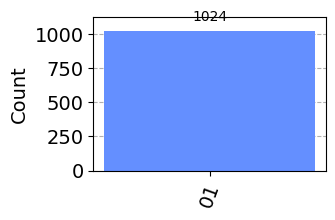

In [4]:
backend = BasicAer.get_backend("qasm_simulator")
# the number of shots is twice the length of the bitstring
shots = 1024
job = execute(QC, backend=backend, shots=shots)
answer = job.result().get_counts()

plot_histogram(answer, figsize=(3,2))

In [5]:
from qiskit import QuantumRegister, ClassicalRegister, QuantumCircuit
from numpy import pi

qreg_q = QuantumRegister(9, 'q')
creg_c = ClassicalRegister(3, 'c')
circuit = QuantumCircuit(qreg_q, creg_c)

circuit.ry(2 * pi / 3, qreg_q[0])
circuit.z(0)
circuit.x(2)
state = Statevector(circuit)

state.draw(output="latex")

<IPython.core.display.Latex object>

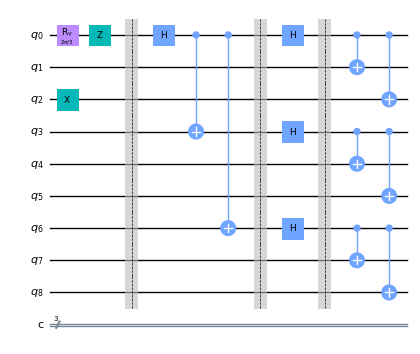

In [6]:
circuit.barrier(qreg_q[0], qreg_q[1], qreg_q[2], qreg_q[3], qreg_q[4], qreg_q[5], qreg_q[6], qreg_q[7], qreg_q[8])
circuit.h(qreg_q[0])
circuit.cx(qreg_q[0], qreg_q[3])
circuit.cx(qreg_q[0], qreg_q[6])
circuit.barrier(qreg_q[0], qreg_q[1], qreg_q[2], qreg_q[3], qreg_q[4], qreg_q[5], qreg_q[6], qreg_q[7], qreg_q[8])
circuit.h(qreg_q[0])
circuit.h(qreg_q[3])
circuit.h(qreg_q[6])
circuit.barrier(qreg_q[0], qreg_q[1], qreg_q[2], qreg_q[3], qreg_q[4], qreg_q[5], qreg_q[6], qreg_q[7], qreg_q[8])
circuit.cx(qreg_q[0], qreg_q[1])
circuit.cx(qreg_q[3], qreg_q[4])
circuit.cx(qreg_q[6], qreg_q[7])
circuit.cx(qreg_q[0], qreg_q[2])
circuit.cx(qreg_q[3], qreg_q[5])
circuit.cx(qreg_q[6], qreg_q[8])

circuit.draw(output="mpl", scale=0.5)

In [7]:
state = Statevector(circuit)
state.draw(output="Latex")

<IPython.core.display.Latex object>

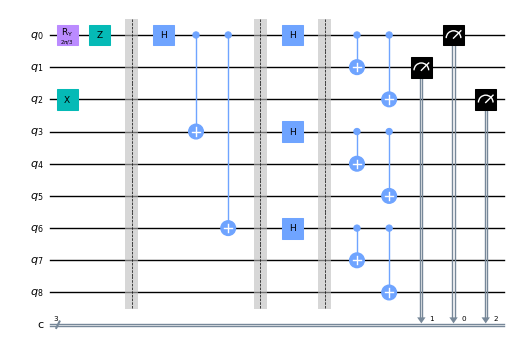

In [8]:
circuit.measure(0,0)
circuit.measure(1,1)
circuit.measure(2,2)

circuit.draw(output="mpl", scale=0.5)


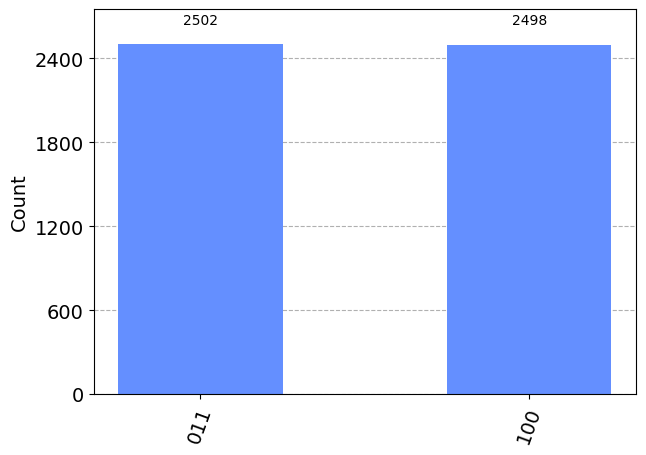

In [9]:
sim = Aer.get_backend('aer_simulator')
job = execute(circuit, sim, shots=5000)
result = job.result()
counts = result.get_counts()
plot_histogram(counts)